# Part-1 -- Support Vector Machine (SVM) Implementation

In [98]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [99]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [100]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [101]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df[50:55] # it will show the second category

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [105]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [106]:
#show each DataFrame neatly in the same output cell
from IPython.display import display
display(df0.head(3), df1.head(3), df2.head(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica


In [107]:
from matplotlib import pyplot as plt
%matplotlib inline

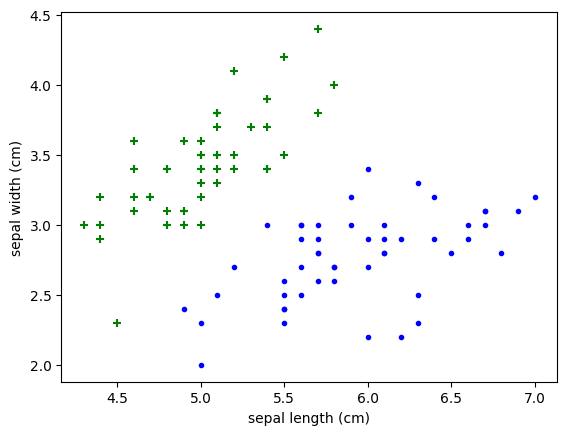

In [108]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='.')

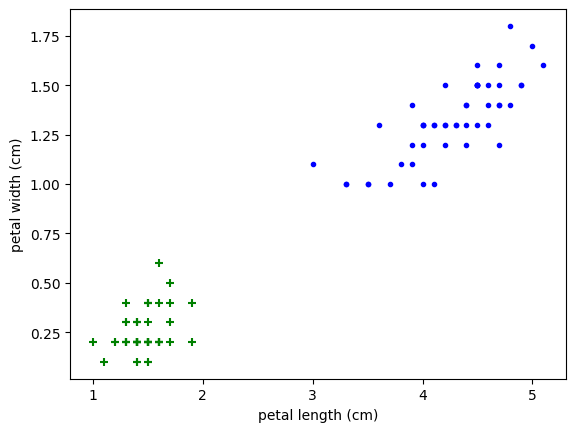

In [109]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue', marker='.')

In [110]:
# you can take axis='columns' or axis=1
X=df.drop(columns=['target','flower_name'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [111]:
y=df.target
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [115]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models={}
results={}
for k in kernels:
  print(f"\n # Kernel = {k}")
  model = SVC(kernel=k, C=1.0, gamma='scale', degree=3, random_state=42)
  model.fit(X_train_scaled, y_train)

  y_pred = model.predict(X_test_scaled)
  acc = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {acc:.4f}")

  print("Classification Report : ")
  print(classification_report(y_test, y_pred, target_names=iris.target_names))

  models[k] = model
  results[k] = acc


 # Kernel = linear
Accuracy: 0.9667
Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


 # Kernel = poly
Accuracy: 0.9667
Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


 # Kernel = rbf
Accuracy: 1.0000
Classification Report : 
              precision    recall  f1-score   support

  

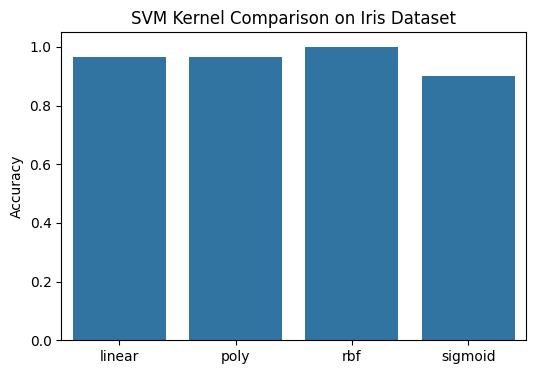

In [116]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("SVM Kernel Comparison on Iris Dataset")
plt.ylabel("Accuracy")
plt.show()

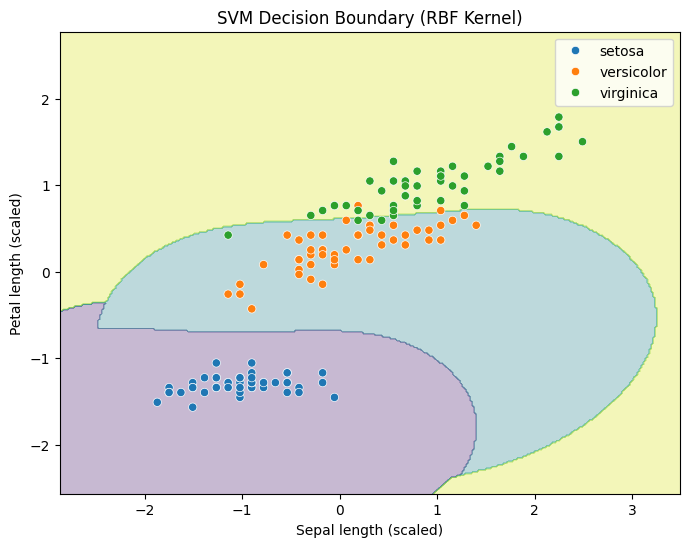

In [117]:
# Use only sepal length and petal length for 2D visualization
X_vis = iris.data[:, [0, 2]]
y_vis = iris.target

# Scale the X_visual using StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_rbf.fit(X_vis_scaled, y_vis)

# Create a mesh grid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict over the grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1], hue=iris.target_names[y_vis])
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Petal length (scaled)")
plt.show()


In [118]:
#Hyperparameter Tuning
param_grid = [
    {'kernel': ['linear'], 'C':[0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C':[0.1, 1, 10], 'degree':[2, 3, 4], 'gamma':['scale','auto']},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1]},
]

In [119]:
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
svm_model = SVC()
grid = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # evaluation metric
    verbose=2,          # show progress
    n_jobs=-1           # use all CPU cores
)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': ['scale', 'auto', 0.1, 1],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [120]:
grid.best_params_

{'C': 10, 'kernel': 'linear'}

In [121]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

In [122]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred_best))
print("\nClassification Report : ")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

Accuracy Score :  0.9666666666666667

Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



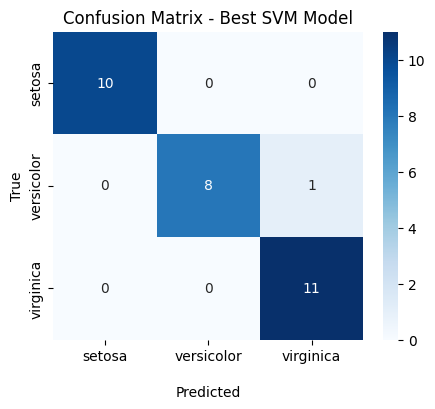

In [126]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Best SVM Model")
plt.xlabel("\nPredicted")
plt.ylabel("True")
plt.show()

### **Part-2 -- SVM Kernels Indepth Intitution**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Circle-1
#x-coordinates is now an array of 100 values: x=[-5.0, -4.9, -4.8, ......0....., 4.8, 4.9, 5.0]
x=np.linspace(-5.0,5.0,100)

#upper half of a circle with radius 10 centered at origin (0,0) y=[8.66,8.78,8.90,...,10,...,8.90,8.78,8.66]
y=np.sqrt(10**2 - x**2)

#horizontally stacks arrays (joins them side-by-side)
#y=[y1​,y2​,...,y100​], −y=[−y1​,−y2​,...,−y100​], new y=[y1​,y2​,...,y100​,−y1​,−y2​,...,−y100​]
y=np.hstack([y,-y])  #y=[8.66,8.78,8.90,...,−8.66,−8.78,−8.90] upper and lower halves of the circle (complete circle vertically)
x=np.hstack([x,-x]) #x=[−5,−4.9,...,+5], −x=[5,4.9,...,−5], new x=[−5,−4.9,...,+5,+5,+4.9,...,−5]


#Circle-2
x1=np.linspace(-5.0,5.0,100) # x1=[−5.0,−4.898,−4.796,...,5.0]
y1=np.sqrt(5**2 - x1**2) #y1=[0.000,1.004,2.008,...,5.000,...,2.008,1.004,0.000]
y1=np.hstack([y1,-y1]) #y1=[y1​,y2​,...,y100​,−y1​,−y2​,...,−y100​]
x1=np.hstack([x1,-x1]) #x1=[−5,−4.9,...,+5,+5,+4.9,...,−5]

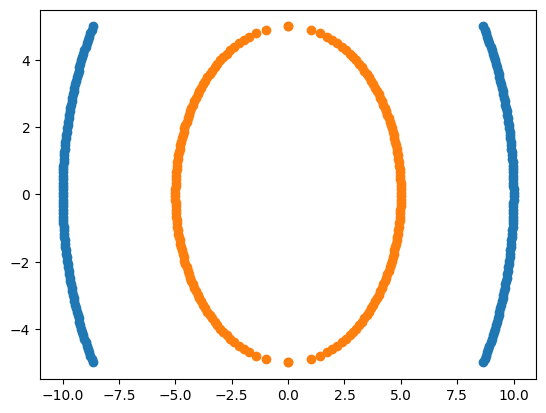

In [24]:
# for both of them we have y on the X-axis and x on the Y-axis
plt.scatter(y,x)
plt.scatter(y1,x1)

In [25]:
import pandas as pd
#np.vstack() means vertical stack, i.e., stack arrays row-wise, Shape=(row=2,col=200)
#After .T (transpose), rows become columns: Shape=(row=200,col=2), (X1 = y-values, X2 = x-values)
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
#Adds a new column Y and assigns value 0 to all rows, All these points belong to Class 0 (the larger circle, radius 10).
df1['Y']=0

#Stack y₁ and x₁ → shape (2, 200), Transpose → shape (200, 2) (X1 (from y₁), X2 (from x₁))
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
#Adds a label Y = 1 for all points in this smaller circle (class 1).
df2['Y']=1

#combine both DataFrames vertically (stack one on top of another).
df = pd.concat([df1,df2])
df.tail(5)

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [26]:
X = df.iloc[:,:2]
y = df.Y

In [27]:
X,y

(           X1       X2
 0    8.660254 -5.00000
 1    8.717792 -4.89899
 2    8.773790 -4.79798
 3    8.828277 -4.69697
 4    8.881281 -4.59596
 ..        ...      ...
 195 -1.969049 -4.59596
 196 -1.714198 -4.69697
 197 -1.406908 -4.79798
 198 -0.999949 -4.89899
 199 -0.000000 -5.00000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 195    1
 196    1
 197    1
 198    1
 199    1
 Name: Y, Length: 400, dtype: int64)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear') #if we use kernel=rbf then accuracy, recall, precision, f1-score will be 1.0
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score is : ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy Score is :  0.45

               precision    recall  f1-score   support

           0       0.50      0.45      0.48        55
           1       0.40      0.44      0.42        45

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.46      0.45      0.45       100



In [32]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


# ***Polynomial Kernel***


#                                   K(x,y) = (x^T*y+c)^d
                                             

In [33]:
#We need to find Components for the polynomial kernel
#X1, X2, X1_square, X2_square, X1*X2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [34]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [35]:
X

,X1,X2,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009
...,...,...,...,...,...
195,-1.969049,-4.59596,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,0.999898,24.000102,4.898740


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [37]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [38]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='Y', color='Y')
fig.show()

In [39]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
fig.show()

In [40]:
classifier = SVC(kernel="linear")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [41]:
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy is :  1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# ***Part-3    SVM - Classification Algorithm***

In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv('Social/Social_Network_Ads.csv')
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [44]:
df.shape

(400, 5)

In [45]:
X = df.iloc[:,2:4] #df.iloc[:,[2,3]]
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [46]:
Y = df.iloc[:,-1] # df.iloc[:,4]
Y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [47]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [48]:
print("Training data : ", X_train.shape)
print("Test data : ", X_test.shape)

Training data :  (300, 2)
Test data :  (100, 2)


In [49]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [50]:
#Apply SVM using Linear Kernel
from sklearn.svm import SVC

# classifier = SVC(kernel='linear',random_state=0)  # Accuracy => 0.9
# classifier = SVC(kernel='rbf',random_state=0) # Accuracy => 0.93
classifier = SVC(kernel='rbf', gamma='scale', C=7, random_state=0) # Accuracy => 0.93
# classifier = SVC(kernel='rbf', gamma=15, C=7, random_state=0) # Accuracy => 0.89
# classifier = SVC(kernel='rbf', gamma=100, C=7, random_state=0) # Accuracy => 0.81
classifier.fit(X_train_scaled,y_train)
#predicting the test set results
y_pred = classifier.predict(X_test_scaled)

In [51]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [52]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score is : ", accuracy_score(y_test, y_pred))
print("\n Classification Report is : ", classification_report(y_test, y_pred))

Accuracy Score is :  0.93

 Classification Report is :                precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [53]:
svc = SVC(kernel='poly', degree=4)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score is :  0.77


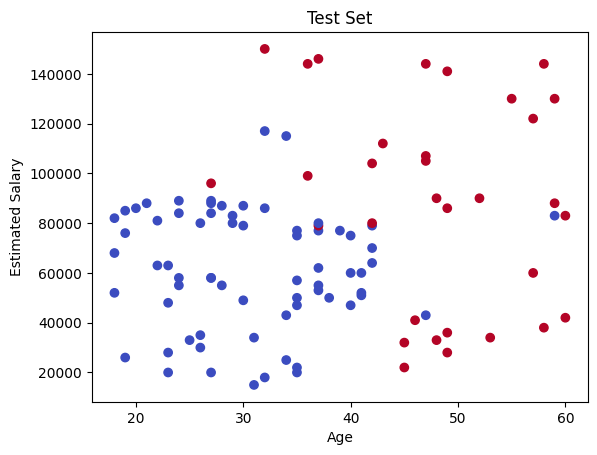

In [54]:
import matplotlib.pyplot as plt
plt.scatter(X_test['Age'],X_test['EstimatedSalary'], c=y_test, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Set')
plt.show()